In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
from IPython.display import display
from birdcall_distribution.data import prepare_dataframe
import pandas as pd
import matplotlib.pyplot as plt

taxonomy_df = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/eBird_Taxonomy_v2021.csv"
)
taxonomy_df.columns = taxonomy_df.columns.str.lower()
species_mapper = taxonomy_df.set_index("species_code")["primary_com_name"].to_dict()

# NOTE: very slow
prep_df, W = prepare_dataframe(
    "../data/ee_v3_americas_5.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=None,
)
prep_df = prep_df[prep_df.index.notnull()]

In [68]:
print(prep_df.shape)
print(prep_df.primary_label.unique().size)

summed = prep_df.groupby("primary_label").y.sum().sort_values(ascending=False)
summed.head(10)

(41814, 33)
138


primary_label
norcar     500.0
normoc     387.0
wesmea     343.0
houfin     321.0
bknsti     179.0
comgal1    177.0
pibgre     159.0
saffin     151.0
lesyel     143.0
moudov     142.0
Name: y, dtype: float64

In [72]:
df = prep_df[prep_df.primary_label == "norcar"]

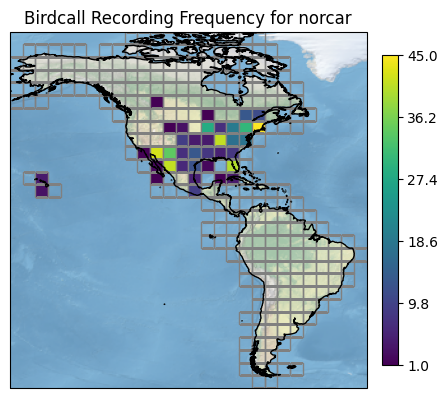

In [73]:
from birdcall_distribution.plot import plot_species

plot_species(df, "norcar")
plt.show()

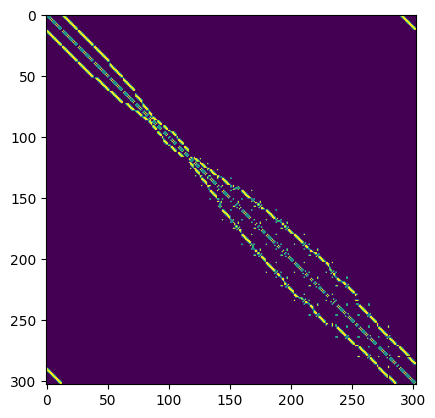

In [74]:
plt.imshow(W)

In [79]:
from birdcall_distribution import model
from birdcall_distribution.plot import plot_ppc_species
import pymc as pm
import arviz as az
import numpy as np

m1 = model.make_pooled_intercept_car_model(df, W)
with m1:
    trace1 = pm.sample(2500, tune=1000, cores=16, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [alpha, sigma_phi, phi, intercept]


Sampling 16 chains for 1_000 tune and 2_500 draw iterations (16_000 + 40_000 draws total) took 239 seconds.


Sampling: [y]


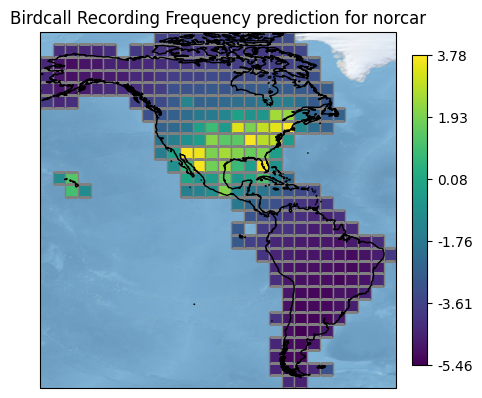

In [96]:
with m1:
    # posterior predictive
    ppc1 = pm.sample_posterior_predictive(trace1)

plot_ppc_species(df, ppc1, "norcar", prop="log_pred")
plt.show()

In [106]:
m2 = model.make_pooled_intercept_pooled_covariate_car_model(df, W)
with m2:
    trace2 = pm.sample(100, tune=100, cores=16, target_accept=0.9)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'alpha_logodds__': array(2.55840935), 'tau_phi_log__': array(0.26116829), 'phi': array([-0.30567598,  0.84843593,  0.324692  ,  0.20820253,  0.85894734,
        0.19222752,  0.12572221,  0.20020852,  0.31942145, -0.02935747,
       -0.66086529,  0.13947532,  0.11997885,  0.09680395,  0.33264851,
        0.00162748, -0.46393395, -0.90501156, -0.91192916, -0.37381608,
        0.26218824,  0.09965276,  0.91051524,  0.93981165, -0.26342016,
        0.41724063, -0.93908393,  0.00642575, -0.99334375, -0.72104841,
        0.42563108,  0.63942928, -0.29245836,  0.27725296,  0.69485974,
        0.89024772, -0.1173109 ,  0.18043988, -0.4665672 , -0.27693214,
       -0.11182041,  0.25903998,  0.01789645,  0.45229136, -0.43741641,
        0.59695214,  0.23149375,  0.99720033,  0.24019724, -0.95676186,
        0.70913881,  0.0013241 ,  0.59681113, -0.77244475, -0.13505434,
        0.98144601, -0.65898466, -0.92840623, -0.30110392,  0.16932972,
       -0.07484414, -0.04989965,  0.24589446, -0.38995465,  0.88941283,
       -0.16484203,  0.30898208, -0.50920627, -0.67273355,  0.96725735,
        0.80226387,  0.21584514, -0.60295523, -0.07370994, -0.52880138,
       -0.95067298,  0.69150708,  0.38392057, -0.96507047,  0.22221441,
        0.22731319, -0.6942324 , -0.60547046,  0.7512799 , -0.93464453,
        0.45597256, -0.73093934, -0.88942835,  0.3903487 , -0.67583921,
       -0.46953536,  0.05419474,  0.18334756,  0.31891297,  0.09159314,
        0.45533505, -0.95176509, -0.94440845,  0.76642793,  0.31539151,
       -0.00973157,  0.87349523, -0.77415392, -0.12565342, -0.67170451,
        0.91493742, -0.77654005, -0.59148568,  0.59087748, -0.97167324,
       -0.43698073, -0.24620197, -0.67687794, -0.41552945,  0.57001223,
        0.95882958, -0.86565438,  0.15130024, -0.48611549, -0.59375875,
       -0.21475237, -0.20255454,  0.65511625,  0.32399129,  0.68105985,
        0.15068071,  0.39017057, -0.07673064, -0.59577738, -0.39724639,
        0.76552258, -0.76155374, -0.15825237, -0.67728359,  0.5850785 ,
        0.24295312, -0.2772987 , -0.7013545 ,  0.15215851, -0.44256528,
       -0.68555193, -0.50039214, -0.44133082, -0.99390181,  0.98459388,
       -0.73562137,  0.10184555, -0.24066475, -0.02066666,  0.20423745,
       -0.74578159,  0.13565972, -0.09374474,  0.59158834,  0.07870902,
        0.14656542, -0.20025215,  0.68407886,  0.82459264, -0.93500631,
       -0.80226109, -0.16615264,  0.55150436,  0.26137636,  0.66244473,
       -0.43770116,  0.26111477, -0.22951584,  0.42452074, -0.04624008,
        0.62683208,  0.41321973, -0.64723354, -0.41264489,  0.49340274,
        0.67865343, -0.10952624, -0.54055823,  0.28903779,  0.59889002,
        0.31921434, -0.27585689, -0.75967704,  0.24572717, -0.31706292,
       -0.06610673,  0.05916304,  0.39995591, -0.95739754, -0.1549687 ,
       -0.94650488,  0.22308699, -0.82745775, -0.84903337, -0.09933003,
       -0.10302935, -0.83470235,  0.49039093, -0.84732488,  0.17802721,
        0.1210231 ,  0.02495294, -0.02512276, -0.76523276, -0.52247477,
       -0.18548859,  0.44674358,  0.23864398, -0.41866336,  0.8644542 ,
       -0.52674519, -0.62564379, -0.6858005 ,  0.17530212, -0.19552103,
        0.20222207,  0.87662235, -0.88902813,  0.78144994,  0.46448611,
       -0.19156499,  0.36637966,  0.04236172,  0.1994105 ,  0.13071247,
       -0.52951567, -0.10607531,  0.38756154, -0.96494434, -0.83126533,
        0.34623249, -0.66438526, -0.81279073, -0.64279567,  0.90124966,
        0.27145678, -0.50292511, -0.71111649, -0.60142878,  0.20462601,
        0.21052046,  0.04659378, -0.85660655, -0.94602209,  0.99335405,
       -0.65956697,  0.07115277,  0.99570101, -0.00181311, -0.52598636,
        0.33613245, -0.6931813 ,  0.85799522, -0.62474645, -0.65895836,
        0.1737755 ,  0.33524465, -0.47404165,  0.10842514,  0.87273686,
        0.30268825,  0.70264225,  0.03251696,  0.65497965,  0.58958752,
        0.40959342,  0.36411566, -0.18638167, -0.33795667, -0.318148  ,
        0.79132461, -0.66889783, -0.84801056,  0.94969296, -0.5362871 ,
        0.3222417 ,  0.70389037, -0.47611052, -0.73173397, -0.12964801,
       -0.73636956,  0.5439685 , -0.86036492,  0.29332296,  0.71063728,
        0.23811322, -0.38040503, -0.19514106,  0.88485838,  0.199894  ,
       -0.85279038, -0.24660764,  0.36620056, -0.69081582,  0.00543493,
        0.29443534,  0.28811947,  0.95479087,  0.49962184,  0.40078509,
        0.62499503,  0.14411745,  0.37160014]), 'intercept': array(0.79836069), 'betas': array([-0.18851927,  0.16655967, -0.7230541 ,  0.74098586,  0.26232786,
        0.66352233, -0.41562238,  0.74390738,  0.78032076,  0.1241983 ,
       -0.88898443, -0.54170573, -0.41922687, -0.92658276, -0.46524569,
       -0.30625548,  0.67985855,  0.08012785, -0.48330834, -0.79569613,
       -0.41560651,  0.07204112, -0.84971784,  0.98772996,  0.12454656,
       -0.8485605 ,  0.53079758])}

Initial evaluation results:
{'alpha': -1.4, 'tau_phi': -6.92, 'phi': -412.7, 'intercept': -4.37, 'betas': -118.07, 'y': -inf}

In [ ]:
az.summary(trace2, kind="stats")

In [100]:
with m2:
    ppc2 = pm.sample_posterior_predictive(trace2)

plot_ppc_species(df, ppc2, "norcar", prop="log_pred")
plt.show()

Sampling: [betas, betas_bar, betas_sigma, intercept, intercept_bar, intercept_sigma, y]


ValueError: lam value too large
Apply node that caused the error: poisson_rv{0, (0,), int64, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x221B0855A80>), TensorConstant{(1,) of 303}, TensorConstant{4}, mu)
Toposort index: 14
Inputs types: [RandomGeneratorType, TensorType(int64, (1,)), TensorType(int64, ()), TensorType(float64, (None,))]
Inputs shapes: ['No shapes', (1,), (), (303,)]
Inputs strides: ['No strides', (8,), (), (8,)]
Inputs values: [Generator(PCG64) at 0x221B0855A80, array([303], dtype=int64), array(4, dtype=int64), 'not shown']
Outputs clients: [['output'], ['output']]

HINT: Re-running with most Aesara optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the Aesara flag 'optimizer=fast_compile'. If that does not work, Aesara optimizations can be disabled with 'optimizer=None'.
HINT: Use the Aesara flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.